<a href="https://colab.research.google.com/github/hannahkates/nyu-python-public-policy/blob/master/nyu_python_public_policy_311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYU Wagner - Python Coding for Public Policy
In this course, we will work extensively with the 311 Service Requests dataset published on NYC Open Data: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data


To do:
- Start with more basic things, like adding a new column to a dataframe
- Joining datasets based on a value
- Talking points:
 - There are always multiple ways to do things. None of them are wrong, but some methods are faster and cleaner than others.

# Dependencies

### Great guide from Boston University introducing highlights of popular packages https://pdfs.semanticscholar.org/407c/05a87c5eb47af7e7cddf414a23d2b4dfdac1.pdf

In [0]:
import pandas as pd

# Class 0 (Oct 24): Opening data and exploring the contents

## LECTURE: Opening data and exploring contents

### Start by importing the 311 Service Requests dataset

In [38]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df = pd.read_csv('/content/drive/My Drive/NYU Python Course/Data/311_Service_Requests_2018-19.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,17,20,31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Preview the data contents using head(), tail(), and sample(n)

In [40]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)"
1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)"
2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)"
3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)"
4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)"


In [41]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
2859195,43619262,08/24/2019 02:00:14 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10463,3308 BAILEY AVENUE,BAILEY AVENUE,WEST 233 STREET,BAILEY PLACE,WEST 233 STREET,BAILEY PLACE,NaN,BRONX,BAILEY AVENUE,NaN,In Progress,NaN,NaN,NaN,08 BRONX,2.032610e+09,BRONX,1011611.0,259792.0,ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.879701,-73.901057,"(40.87970084316435, -73.9010571445122)"
2859196,43622052,08/24/2019 02:00:20 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11237,265 STOCKHOLM STREET,STOCKHOLM STREET,KNICKERBOCKER AVENUE,IRVING AVENUE,KNICKERBOCKER AVENUE,IRVING AVENUE,NaN,BROOKLYN,STOCKHOLM STREET,NaN,In Progress,NaN,NaN,NaN,04 BROOKLYN,3.032470e+09,BROOKLYN,1006278.0,194965.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.701783,-73.920555,"(40.70178323733244, -73.92055493919345)"
2859197,43625918,08/24/2019 02:00:27 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11233,560 RALPH AVENUE,RALPH AVENUE,ST JOHNS PLACE,LINCOLN PLACE,ST JOHNS PLACE,LINCOLN PLACE,NaN,BROOKLYN,RALPH AVENUE,NaN,In Progress,NaN,NaN,NaN,08 BROOKLYN,3.013870e+09,BROOKLYN,1005752.0,183382.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669992,-73.922489,"(40.66999185896368, -73.9224889475533)"
2859198,43622055,08/24/2019 02:00:54 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In Progress,NaN,NaN,NaN,0 Unspecified,NaN,Unspecified,NaN,NaN,MOBILE,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2859199,43623704,08/24/2019 02:00:56 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10303,2806 RICHMOND TERRACE,RICHMOND TERRACE,GIORDAN COURT,VAN PELT AVENUE,GIORDAN COURT,VAN PELT AVENUE,NaN,STATEN ISLAND,RICHMOND TERRACE,NaN,In Progress,NaN,NaN,NaN,01 STATEN ISLAND,5.011880e+09,STATEN ISLAND,941514.0,171315.0,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636794,-74.153979,"(40.63679359185655, -74.15397942810047)"


In [42]:
df.sample(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
2848965,43613343,08/22/2019 11:35:00 AM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11236,1335 EAST 85 STREET,EAST 85 STREET,AVENUE M,AVENUE N,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaN,NaN,NaN,18 BROOKLYN,3.080760e+09,BROOKLYN,1011561.0,169067.0,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.630684,-73.901606,"(40.63068430457353, -73.90160646959906)"
1061641,41201125,12/16/2018 05:31:46 PM,12/19/2018 10:54:05 AM,DOT,Department of Transportation,Street Condition,Blocked - Construction,Street,11211,NaN,NaN,NaN,NaN,HEWES STREET,BEDFORD AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,12/26/2018 05:31:46 PM,The Department of Transportation inspected th...,12/19/2018 10:54:05 AM,01 BROOKLYN,NaN,BROOKLYN,995526.0,195229.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702528,-73.959332,"(40.702528088461996, -73.95933210350155)"
2073326,42587934,05/04/2019 03:18:51 AM,05/04/2019 04:25:02 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11225,105 WINTHROP AVENUE,WINTHROP AVENUE,FLATBUSH AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,05/04/2019 11:18:51 AM,The Police Department issued a summons in resp...,05/04/2019 04:25:02 AM,09 BROOKLYN,3.050450e+09,BROOKLYN,996203.0,178530.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656692,-73.956920,"(40.65669223671254, -73.95692006228899)"
2081036,42591393,05/05/2019 10:44:00 AM,05/06/2019 10:50:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11106,35-36 34 STREET,34 STREET,35 AVE,36 AVE,NaN,NaN,ADDRESS,Astoria,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,05/06/2019 10:50:00 AM,01 QUEENS,4.006060e+09,QUEENS,1004579.0,214854.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756378,-73.926622,"(40.75637772921221, -73.92662237627287)"
646566,40639351,10/23/2018 09:47:00 AM,10/23/2018 09:47:00 AM,DEP,Department of Environmental Protection,Water System,Other Water Problem (Use Comments) (WZZ),NaN,11204,1673 66 STREET,66 STREET,WALLASTON CT,17 AVE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,10/23/2018 09:47:00 AM,11 BROOKLYN,3.055520e+09,BROOKLYN,986019.0,165247.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.620241,-73.993628,"(40.62024113024157, -73.9936278098096)"
1721681,41980913,03/17/2019 09:30:00 PM,03/17/2019 10:10:00 PM,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11434,120-09 LAKEVIEW BLVD EAST,LAKEVIEW BLVD EAST,120 AVE,121 AVE,NaN,NaN,ADDRESS,Jamaica,NaN,NaN,Closed,NaN,The Department of Environmental Protection has...,03/17/2019 10:10:00 PM,12 QUEENS,4.122500e+09,QUEENS,1044077.0,186794.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679181,-73.784304,"(40.6791809682598, -73.78430393507122)"
1045805,41187308,12/14/2018 07:30:50 AM,12/14/2018 12:50:34 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10467,717 EAST 222 STREET,EAST 222 STREET,WHITE PLAINS ROAD,BARNES AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,12/14/2018 03:30:50 PM,The Police Department responded to the complai...,12/14/2018 12:50:34 PM,12 BRONX,2.048360e+09,BRONX,1022750.0,261892.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.885423,

### How many records are in the dataset?

In [43]:
df['Unique Key'].size

2859200

### What'*s* in this dataset?
### - How many records are in the dataset?
### - What are all the columns in the dataset?
### - What is the data type of each column? (I.e. what types of values does each column contain?)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859200 entries, 0 to 2859199
Data columns (total 41 columns):
Unique Key                        int64
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Description     

### What are the distinct sets of values in columns that seem most useful?

In [45]:
set(df['Status'])

{'Assigned',
 'Closed',
 'Email Sent',
 'In Progress',
 'Open',
 'Pending',
 'Started',
 'Unspecified'}

In [46]:
df['Open Data Channel Type'].unique()


array(['MOBILE', 'PHONE', 'ONLINE', 'UNKNOWN', 'OTHER'], dtype=object)

In [47]:
df['Agency'].unique()

array(['DHS', 'HPD', 'NYPD', 'DEP', 'DSNY', 'DOT', 'HRA', 'DPR', 'TLC',
       'DCA', 'DOHMH', 'DOB', 'DOITT', 'DCAS', 'DFTA', 'DOF', 'ACS',
       'FDNY', 'DOE', 'NYCEM', 'EDC', 'TAX', 'DCP', 'COIB', 'TAT', 'OMB',
       'MOC', 'DVS'], dtype=object)

In [48]:
set(df['Complaint Type'])

{'"-->\'-->`-->&...',
 '$(sleep 11)',
 '${3804*3137}',
 '%2e%2e%2f%2e%2e%2f%2e%2e%2f...',
 '%2e%2e%5c%2e%2e%5c%2e%2e%5c...',
 '%2fetc%2fpasswd',
 '%E5%98%8A%E5%98%8DX-Injecti...',
 '%c0%ae/%c0%ae/%c0%ae/%c0%ae...',
 '%c0%ae/%c0%ae/%c0%ae/WEB-IN...',
 '%c0%ae/%c0%ae/WEB-INF/web.xml',
 '%c0%ae/WEB-INF/web.xml',
 '%{(#dm=@ognl.OgnlContext@DE...',
 '%{4761*8506}',
 '() { :;}; /bin/sleep 0',
 '() { :;}; /bin/sleep 11',
 '() { _; } >_',
 '(select extractvalue(xmltyp...',
 "(select load_file('\\\\\\\\615h...",
 '*)(!(objectClass=*)',
 '*)(objectClass=*',
 '.../....///.../....///.../....',
 '.../...//.../...//.../...//...',
 '..././..././..././..././......',
 '.../.\\.../.\\.../.\\.../.\\......',
 '.../Misc. Comments',
 '...\\./...\\./...\\./...\\./......',
 '...\\.\\...\\.\\...\\.\\...\\.\\......',
 '../../../../../../../../../...',
 '../../../../WEB-INF/web.xml',
 '../../../WEB-INF/web.xml',
 '../../../WEB-INF/web.xml;x=',
 '../../WEB-INF/web.xml',
 '../../WEB-INF/web.xml;x=',
 '../WEB-INF/w

## HOMEWORK: Best practices, indexes, "for" loops, and aggregation

https://www.python.org/dev/peps/pep-0008/

https://docs.python-guide.org/writing/style/

Tutorial covering for loops, Indexes


Pandas sum, mean, group by https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

# Class 1 (Oct 31): Data cleanup, "for" loops and iterating, basic summary stats

## LECTURE: Part 1. "For" loops

### "For" loops for iterating through items

In [49]:
text = 'Hello my name is Hannah'
for letter in text:
  print(letter)

H
e
l
l
o
 
m
y
 
n
a
m
e
 
i
s
 
H
a
n
n
a
h


In [50]:
text[6]

'm'

In [51]:
len(text)

23

In [52]:
i = 0
for l in text:
  print(l, i, text[i])
  i += 1

H 0 H
e 1 e
l 2 l
l 3 l
o 4 o
  5  
m 6 m
y 7 y
  8  
n 9 n
a 10 a
m 11 m
e 12 e
  13  
i 14 i
s 15 s
  16  
H 17 H
a 18 a
n 19 n
n 20 n
a 21 a
h 22 h


In [53]:
text.replace('m', 'zzzzz')

'Hello zzzzzy nazzzzze is Hannah'

### Print a sentence explaining each complaint using a "for" loop

Resource explaining interrows vs. itertuples (itertuples is faster): https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

In [54]:
# iterate over rows with iterrows()
for index, row in df.head().iterrows():
     # access data using column names
     print(index, 'On', row['Created Date'], ', a user filed a request for', row['Complaint Type'], 'to', row['Agency'])

0 On 08/01/2018 12:00:10 AM , a user filed a request for Homeless Person Assistance to DHS
1 On 08/01/2018 12:00:26 AM , a user filed a request for DOOR/WINDOW to HPD
2 On 08/01/2018 12:00:54 AM , a user filed a request for Noise - Residential to NYPD
3 On 08/01/2018 12:01:00 AM , a user filed a request for Noise to DEP
4 On 08/01/2018 12:01:00 AM , a user filed a request for Request Large Bulky Item Collection to DSNY


### Let's find out what people complain about the most. Which complaint types occur the most?

### Use groupby([ ]).count() to try to find out which 311 requests are the most common. This is very similar to a pivot table in Excel.

In [55]:
df.groupby(['Complaint Type']).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""-->'-->`-->&...",1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
$(sleep 11),1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
${3804*3137},1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
%2e%2e%2f%2e%2e%2f%2e%2e%2f...,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
%2e%2e%5c%2e%2e%5c%2e%2e%5c...,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
%2fetc%2fpasswd,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
%E5%98%8A%E5%98%8DX-Injecti...,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
%c0%ae/%c0%ae/%c0%ae/%c0%ae...,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
%c0%ae/%c0%ae/%c0%ae/WEB-IN...,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0


### Two problems here:
1. Too many columns and their headers have spaces in them
2. Data is full of garbage values

## LECTURE: Part 2. Cleaning data and prepping for analysis

### Let's start with making the columns easier to work with

There are two different ways to access a column: `df['column_name']` and `df.column_name`, but the latter only works if the header doesn't have spaces in it.

In [56]:
df['Complaint Type']

0                   Homeless Person Assistance
1                                  DOOR/WINDOW
2                          Noise - Residential
3                                        Noise
4          Request Large Bulky Item Collection
5                      Noise - Street/Sidewalk
6                      Noise - Street/Sidewalk
7                           Noise - Commercial
8                             Blocked Driveway
9                      Noise - Street/Sidewalk
10                     Noise - Street/Sidewalk
11                         Noise - Residential
12                            Street Condition
13                            Blocked Driveway
14                            Street Condition
15                              HEAT/HOT WATER
16                         Noise - Residential
17                         Noise - Residential
18                         Noise - Residential
19                     Noise - Street/Sidewalk
20                        UNSANITARY CONDITION
21           

In [57]:
# get list of all columnn names. many of these have spaces in them which makes it harder to reference in the code.
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [58]:
# we can use a "for" loop to rename the columns and get rid of the spaces and make the names lowercase
df.columns = [c.replace(' ', '_').lower() for c in df.columns]
df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'bbl', 'borough', 'x_coordinate_(state_plane)',
       'y_coordinate_(state_plane)', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'vehicle_type',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'latitude', 'longitude', 'location'],
      dtype='object')

In [59]:
# now we can reference the column simply using a . !
df.complaint_type

0                   Homeless Person Assistance
1                                  DOOR/WINDOW
2                          Noise - Residential
3                                        Noise
4          Request Large Bulky Item Collection
5                      Noise - Street/Sidewalk
6                      Noise - Street/Sidewalk
7                           Noise - Commercial
8                             Blocked Driveway
9                      Noise - Street/Sidewalk
10                     Noise - Street/Sidewalk
11                         Noise - Residential
12                            Street Condition
13                            Blocked Driveway
14                            Street Condition
15                              HEAT/HOT WATER
16                         Noise - Residential
17                         Noise - Residential
18                         Noise - Residential
19                     Noise - Street/Sidewalk
20                        UNSANITARY CONDITION
21           

In [60]:
# see how this revised for loop is cleaner to underatand now
for index, row in df.head().iterrows():
     # access data using column names
     print(index, 'On', row.created_date, ', a user filed a request for', row.complaint_type, 'to', row.agency)

0 On 08/01/2018 12:00:10 AM , a user filed a request for Homeless Person Assistance to DHS
1 On 08/01/2018 12:00:26 AM , a user filed a request for DOOR/WINDOW to HPD
2 On 08/01/2018 12:00:54 AM , a user filed a request for Noise - Residential to NYPD
3 On 08/01/2018 12:01:00 AM , a user filed a request for Noise to DEP
4 On 08/01/2018 12:01:00 AM , a user filed a request for Request Large Bulky Item Collection to DSNY


### Back to trying to get the count of records by complaint type

In [61]:
# these are the most useful columns for finding out which complaint type is most common
df[['complaint_type','unique_key']]

,complaint_type,unique_key
0,Homeless Person Assistance,39888071
1,DOOR/WINDOW,39889166
2,Noise - Residential,39882869
3,Noise,39894246
4,Request Large Bulky Item Collection,39881329
5,Noise - Street/Sidewalk,39882413
6,Noise - Street/Sidewalk,39884833
7,Noise - Commercial,39887036
8,Blocked Driveway,39887285
9,Noise - Street/Sidewalk,39885757


In [62]:
df[['complaint_type','unique_key']].groupby('complaint_type').size().nlargest(15).reset_index(name='count')

,complaint_type,count
0,Noise - Residential,236350
1,HEAT/HOT WATER,222722
2,Illegal Parking,195159
3,Request Large Bulky Item Collection,177175
4,Blocked Driveway,145446
5,Street Condition,97178
6,Noise - Street/Sidewalk,95977
7,UNSANITARY CONDITION,85904
8,Street Light Condition,77755
9,Water System,74139


### Now we need to figure out how to exclude the garbage records

Try excluding all categories with < 2 records

In [63]:
counts = df[['complaint_type','unique_key']].groupby('complaint_type').size().reset_index(name='count')
counts.info

<bound method DataFrame.info of                      complaint_type  count
0                  "-->'-->`-->&...      1
1                       $(sleep 11)      1
2                      ${3804*3137}      1
3    %2e%2e%2f%2e%2e%2f%2e%2e%2f...      1
4    %2e%2e%5c%2e%2e%5c%2e%2e%5c...      1
5                   %2fetc%2fpasswd      1
6    %E5%98%8A%E5%98%8DX-Injecti...      1
7    %c0%ae/%c0%ae/%c0%ae/%c0%ae...      1
8    %c0%ae/%c0%ae/%c0%ae/WEB-IN...      1
9     %c0%ae/%c0%ae/WEB-INF/web.xml      1
10           %c0%ae/WEB-INF/web.xml      1
11   %{(#dm=@ognl.OgnlContext@DE...      1
12                     %{4761*8506}      1
13           () { :;}; /bin/sleep 0      1
14          () { :;}; /bin/sleep 11      1
15                     () { _; } >_      1
16   (select extractvalue(xmltyp...      1
17   (select load_file('\\\\615h...      1
18              *)(!(objectClass=*)      1
19                 *)(objectClass=*      1
20   .../....///.../....///.../....      1
21   .../...//.../.../

In [64]:
# filter out all complaint types that only 4 or less instances in the data, assuming they are bad data entried
# save the list of clean complaint types as a series
complaint_types_cleaned = counts.complaint_type[counts['count'] > 4]
complaint_types_cleaned

45                             APPLIANCE
46                     Abandoned Vehicle
48                       Advocate - Lien
49                      Advocate - Other
50                       Advocate - RPIE
52         Advocate-Co-opCondo Abatement
53        Advocate-Commercial Exemptions
55          Advocate-Personal Exemptions
57         Advocate-Prop Refunds/Credits
58               Advocate-Property Value
60                           Air Quality
61                      Alzheimer's Care
62                          Animal Abuse
63           Animal Facility - No Permit
64                      Animal in a Park
65                          Animal-Abuse
67                              Asbestos
68                      BEST/Site Safety
69            Beach/Pool/Sauna Complaint
70              Benefit Card Replacement
71             Bereavement Support Group
72                   Bike Rack Condition
73             Bike/Roller/Skate Chronic
74                      Blocked Driveway
75              

In [65]:
# filter our df dataframe to only keep the rows where the complaint_type value is in the "complaint_types_cleaned" series we created in the previous step
df_cleaned = df[df.complaint_type.isin(complaint_types_cleaned)]
# print the set of complaint_type values from our cleaned dataframe
set(df_cleaned.complaint_type)

{'APPLIANCE',
 'Abandoned Vehicle',
 'Advocate - Lien',
 'Advocate - Other',
 'Advocate - RPIE',
 'Advocate-Co-opCondo Abatement',
 'Advocate-Commercial Exemptions',
 'Advocate-Personal Exemptions',
 'Advocate-Prop Refunds/Credits',
 'Advocate-Property Value',
 'Air Quality',
 "Alzheimer's Care",
 'Animal Abuse',
 'Animal Facility - No Permit',
 'Animal in a Park',
 'Animal-Abuse',
 'Asbestos',
 'BEST/Site Safety',
 'Beach/Pool/Sauna Complaint',
 'Benefit Card Replacement',
 'Bereavement Support Group',
 'Bike Rack Condition',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Boilers',
 'Borough Office',
 'Bottled Water',
 'Bridge Condition',
 'Broken Parking Meter',
 'Building Marshals office',
 'Building/Use',
 'Bus Stop Shelter Complaint',
 'Bus Stop Shelter Placement',
 'Calorie Labeling',
 'Case Management Agency Complaint',
 'Collection Truck Noise',
 'Comments',
 'Construction Safety Enforcement',
 'Consumer Complaint',
 'Cooling Tower',
 'Cranes and Derricks',
 'Curb Conditi

Try using "regex" (regular expressions) to tag records with weird characters

## LECTURE: Part 3. Aggregations and summary stats

### OK data prep is done, let's get back to answering our research questions

Which complaints are the most common?

In [66]:
df_cleaned.groupby('complaint_type').size().nlargest(15).reset_index(name='count')

,complaint_type,count
0,Noise - Residential,236350
1,HEAT/HOT WATER,222722
2,Illegal Parking,195159
3,Request Large Bulky Item Collection,177175
4,Blocked Driveway,145446
5,Street Condition,97178
6,Noise - Street/Sidewalk,95977
7,UNSANITARY CONDITION,85904
8,Street Light Condition,77755
9,Water System,74139


Which agencies are responsible for these complaint categories?

In [67]:
df_cleaned.groupby(['agency', 'complaint_type']).size().nlargest(15).reset_index(name='count')

,agency,complaint_type,count
0,NYPD,Noise - Residential,236350
1,HPD,HEAT/HOT WATER,222722
2,NYPD,Illegal Parking,195159
3,DSNY,Request Large Bulky Item Collection,177175
4,NYPD,Blocked Driveway,145446
5,DOT,Street Condition,97178
6,NYPD,Noise - Street/Sidewalk,95977
7,HPD,UNSANITARY CONDITION,85904
8,DOT,Street Light Condition,77755
9,DEP,Water System,74139


Which agencies receive the most 311 requests?

In [68]:
df_cleaned.groupby('agency').size().nlargest(15).reset_index(name='count')

,agency,count
0,NYPD,850077
1,HPD,603043
2,DSNY,420165
3,DOT,298879
4,DEP,207280
5,DOB,149656
6,DPR,119970
7,DOHMH,72253
8,DOF,41436
9,TLC,35730


What is the most frequent request per agency? (using for loop)

What is the most frequent request per agency? (sorting descending and using duplicates)

In [69]:
agency_counts = df_cleaned.groupby(['agency', 'complaint_type']).size().reset_index(name='count')
# use "drop_duplicates" function to keep the row with the highest value per agency
agency_counts.sort_values('count', ascending=False).drop_duplicates(['agency'])

,agency,complaint_type,count
216,NYPD,Noise - Residential,236350
185,HPD,HEAT/HOT WATER,222722
166,DSNY,Request Large Bulky Item Collection,177175
133,DOT,Street Condition,97178
18,DEP,Water System,74139
44,DOB,General Construction/Plumbing,54939
103,DOHMH,Rodent,35460
142,DPR,Damaged Tree,34034
30,DHS,Homeless Person Assistance,20991
2,DCA,Consumer Complaint,16385


## HOMEWORK: Exploring Trends in How People Submit 311 Requests

Q1. Which complaint submission method (`open_data_channel_type`) is used most frequently, according to this dataset? Provide the count of each for comparison.

In [70]:
df_cleaned.groupby('open_data_channel_type').size().reset_index(name='count').sort_values('count', ascending=False)

,open_data_channel_type,count
3,PHONE,1463204
1,ONLINE,589865
4,UNKNOWN,417916
0,MOBILE,368759
2,OTHER,19267


A1. Phone

Q2. Get the count of each submission method per compaint type, sorted by complaint type. Review the results and share a sentence or two with your observations: can you provide a potential explaination for why some complaints are more frequently made via phone or mobile?

In [71]:
df_cleaned.groupby(['complaint_type', 'open_data_channel_type']).size().reset_index(name='count').sort_values('complaint_type', ascending=False)

,complaint_type,open_data_channel_type,count
518,X-Ray Machine/Equipment,PHONE,4
517,X-Ray Machine/Equipment,ONLINE,5
516,Window Guard,UNKNOWN,1
515,Window Guard,PHONE,13
514,Window Guard,ONLINE,17
513,Water System,UNKNOWN,18050
512,Water System,PHONE,40974
511,Water System,OTHER,3102
510,Water System,ONLINE,8011
509,Water System,MOBILE,4002


A2. Many complaint types that have a higher proportion of mobile and phone complaints are ones that people are likely to run into while they are out and about on the street, like abondoned vehicles, vacant lots, or water leaks in the street.

Q3. Provide a simplified table that lists the most common request submission method for each complaint type

In [72]:
complaint_counts = df_cleaned.groupby(['complaint_type', 'open_data_channel_type']).size().reset_index(name='count')
complaint_counts.sort_values('count', ascending=False).drop_duplicates(['complaint_type'])

,complaint_type,open_data_channel_type,count
378,Request Large Bulky Item Collection,PHONE,177175
200,HEAT/HOT WATER,PHONE,128002
316,Noise - Residential,PHONE,95407
47,Blocked Driveway,PHONE,95206
429,Street Light Condition,UNKNOWN,77755
240,Illegal Parking,MOBILE,75784
473,UNSANITARY CONDITION,PHONE,63619
428,Street Condition,UNKNOWN,61508
191,General Construction/Plumbing,UNKNOWN,54939
345,PAINT/PLASTER,PHONE,46163


# Class 2 (Nov 7): Manipulating/combining DataFrames and writing functions 

## LECTURE: Which community districts have the most requests? Why might that be?

### Steps:
- Introduce Community Districts - what are they?
- Map Community Districts using Geopandas and Mapplotlib
- Get count of 311 requests per Community District
- Explain types of joins
- Join request counts onto CD geodataframe after creating shared unique ID
- Join population data onto CD geodataframe after creating shared unique ID
- Calculate requests per capita

### What are Community Districts? Let's see them on a map

In [73]:
# first we need to install geopandas, a library that lets us open spatial data files
pip install geopandas

In [0]:
import geopandas as gpd

In [75]:
# Read in shapefile hosted on Google Drive using Geopandas
# Original data source on NYC Planning's website: https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page
gdf = gpd.read_file('/content/drive/My Drive/NYU Python Course/Data/nycd_19c/nycd.shp')
gdf.head()

,BoroCD,Shape_Leng,Shape_Area,geometry
0,311,51549.557306,1.031778e+08,"POLYGON ((991748.394 161084.955, 991860.956 16..."
1,313,65821.875531,8.819569e+07,"POLYGON ((988770.762 156350.512, 988958.229 15..."
2,312,52245.830194,9.952550e+07,"POLYGON ((992187.408 175455.468, 992239.079 17..."
3,304,37008.100085,5.666322e+07,"POLYGON ((1012965.523 187886.950, 1012949.003 ..."
4,206,35875.711802,4.266431e+07,"POLYGON ((1019707.979 246708.141, 1019688.551 ..."


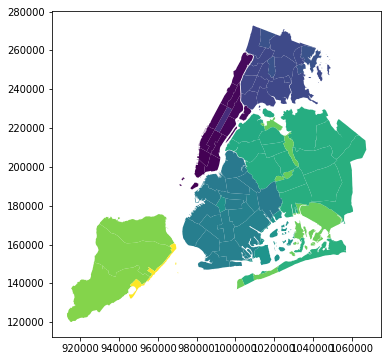

In [76]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(14, 6))
gdf.plot(column='BoroCD',
                ax=ax)

Good map tutorial for reference: https://www.earthdatascience.org/courses/earth-analytics-python/spatial-data-vector-shapefiles/python-customize-map-legends-geopandas/

### Get count of 311 requests per Community District

In [77]:
cb_counts = df_cleaned.groupby('community_board').size().reset_index(name='count_of_requests').sort_values('count_of_requests', ascending=False)
cb_counts.head(10)

,community_board,count_of_requests
50,12 MANHATTAN,81402
23,05 QUEENS,71506
51,12 QUEENS,70361
2,01 BROOKLYN,68101
12,03 BROOKLYN,66360
5,01 STATEN ISLAND,65145
31,07 QUEENS,63634
21,05 BROOKLYN,61836
16,04 BRONX,61086
4,01 QUEENS,60425


### Create `borocd` column in `cb_counts` dataframe, so we can join it on

In [78]:
def get_borocd(row):
  if 'MANHATTAN' in row.community_board:
    return 100 + int(row.community_board[:2])
  elif 'BRONX' in row.community_board:
    return 200 + int(row.community_board[:2])
  elif 'BROOKLYN' in row.community_board:
    return 300 + int(row.community_board[:2])
  elif 'QUEENS' in row.community_board:
    return 400 + int(row.community_board[:2])
  elif 'STATEN ISLAND' in row.community_board:
    return 500 + int(row.community_board[:2])

cb_counts['borocd'] = cb_counts.apply(get_borocd, axis=1)
cb_counts.head()

ValueError: ignored

In [80]:
# uh oh, there are some unexpected values in here - how can we get around them? let's only recode records that don't start with "U"
def get_borocd(row):
  if 'MANHATTAN' in row.community_board:
    if row.community_board[:1] != 'U':
      return 100 + int(row.community_board[:2])
  elif 'BRONX' in row.community_board:
    if row.community_board[:1] != 'U':
      return 200 + int(row.community_board[:2])
  elif 'BROOKLYN' in row.community_board:
    if row.community_board[:1] != 'U':
      return 300 + int(row.community_board[:2])
  elif 'QUEENS' in row.community_board:
    if row.community_board[:1] != 'U':
      return 400 + int(row.community_board[:2])
  elif 'STATEN ISLAND' in row.community_board:
    if row.community_board[:1] != 'U':
      return 500 + int(row.community_board[:2])

cb_counts['borocd'] = cb_counts.apply(get_borocd, axis=1)
cb_counts.head(10)

,community_board,count_of_requests,borocd
50,12 MANHATTAN,81402,112.0
23,05 QUEENS,71506,405.0
51,12 QUEENS,70361,412.0
2,01 BROOKLYN,68101,301.0
12,03 BROOKLYN,66360,303.0
5,01 STATEN ISLAND,65145,501.0
31,07 QUEENS,63634,407.0
21,05 BROOKLYN,61836,305.0
16,04 BRONX,61086,204.0
4,01 QUEENS,60425,401.0


In [81]:
# we can make this function more concise
def get_borocd(row):
  if row.community_board[:1] != 'U':
    if 'MANHATTAN' in row.community_board:
      return 100 + int(row.community_board[:2])
    elif 'BRONX' in row.community_board:
      return 200 + int(row.community_board[:2])
    elif 'BROOKLYN' in row.community_board:
      return 300 + int(row.community_board[:2])
    elif 'QUEENS' in row.community_board:
      return 400 + int(row.community_board[:2])
    elif 'STATEN ISLAND' in row.community_board:
      return 500 + int(row.community_board[:2])

cb_counts['borocd'] = cb_counts.apply(get_borocd, axis=1)
cb_counts.head(10)

,community_board,count_of_requests,borocd
50,12 MANHATTAN,81402,112.0
23,05 QUEENS,71506,405.0
51,12 QUEENS,70361,412.0
2,01 BROOKLYN,68101,301.0
12,03 BROOKLYN,66360,303.0
5,01 STATEN ISLAND,65145,501.0
31,07 QUEENS,63634,407.0
21,05 BROOKLYN,61836,305.0
16,04 BRONX,61086,204.0
4,01 QUEENS,60425,401.0


In [82]:
# now lets join this count data onto our CD dataset
merged_data = pd.merge(left=gdf,right=cb_counts, left_on='BoroCD', right_on='borocd')
merged_data.head()

,BoroCD,Shape_Leng,Shape_Area,geometry,community_board,count_of_requests,borocd
0,311,51549.557306,1.031778e+08,"POLYGON ((991748.394 161084.955, 991860.956 16...",11 BROOKLYN,52801,311.0
1,313,65821.875531,8.819569e+07,"POLYGON ((988770.762 156350.512, 988958.229 15...",13 BROOKLYN,22156,313.0
2,312,52245.830194,9.952550e+07,"POLYGON ((992187.408 175455.468, 992239.079 17...",12 BROOKLYN,46420,312.0
3,304,37008.100085,5.666322e+07,"POLYGON ((1012965.523 187886.950, 1012949.003 ...",04 BROOKLYN,49552,304.0
4,206,35875.711802,4.266431e+07,"POLYGON ((1019707.979 246708.141, 1019688.551 ...",06 BRONX,32439,206.0


### Create `borocd` column in `population` dataframe, so we can join it on

In [83]:
# Data source for population by Community District: https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2/data
population = pd.read_csv('/content/drive/My Drive/NYU Python Course/Data/New_York_City_Population_By_Community_Districts.csv', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


Good tutorial of different ways to apply functions to items in a list: https://chrisalbon.com/python/basics/applying_functions_to_list_items/
Applying functions to columns in a dataframe: http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/

In [86]:
# Create a function that combines and recodes the Borough and CD Number values to create a BoroCD unique ID

def get_borocd(row):
  if row['Borough'] == 'Manhattan':
    return 100 + row['CD Number']
  elif row['Borough'] == 'Bronx':
    return 200 + row['CD Number']
  elif row['Borough'] == 'Brooklyn':
    return 300 + row['CD Number']
  elif row['Borough'] == 'Queens':
    return 400 + row['CD Number']
  elif row['Borough'] == 'Staten Island':
    return 500 + row['CD Number']

population['borocd'] = population.apply(get_borocd, axis=1)
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,borocd
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497,201
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246,202
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762,203
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441,204
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200,205


In [87]:
# now lets join this population data onto our CD dataset
merged_data = pd.merge(left=merged_data,right=population, left_on='BoroCD', right_on='borocd')
merged_data.head()

,BoroCD,Shape_Leng,Shape_Area,geometry,community_board,count_of_requests,borocd_x,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,borocd_y
0,311,51549.557306,1.031778e+08,"POLYGON ((991748.394 161084.955, 991860.956 16...",11 BROOKLYN,52801,311.0,Brooklyn,11,"Bensonhurst, Bath Beach",170119,155072,149994,172129,181981,311
1,313,65821.875531,8.819569e+07,"POLYGON ((988770.762 156350.512, 988958.229 15...",13 BROOKLYN,22156,313.0,Brooklyn,13,"Coney Island, Brighton Beach",97750,100030,102596,106120,104278,313
2,312,52245.830194,9.952550e+07,"POLYGON ((992187.408 175455.468, 992239.079 17...",12 BROOKLYN,46420,312.0,Brooklyn,12,"Borough Park, Ocean Parkway",166301,155899,160018,185046,191382,312
3,304,37008.100085,5.666322e+07,"POLYGON ((1012965.523 187886.950, 1012949.003 ...",04 BROOKLYN,49552,304.0,Brooklyn,4,Bushwick,137902,92497,102572,104358,112634,304
4,206,35875.711802,4.266431e+07,"POLYGON ((1019707.979 246708.141, 1019688.551 ...",06 BRONX,32439,206.0,Bronx,6,"East Tremont, Belmont",114137,65016,68061,75688,83268,206


### What is the request count per capita in each community district?

In [89]:
# divide request count by 2010 population to get request per capita
merged_data['request_per_capita'] = merged_data['count_of_requests'] / merged_data['2010 Population']
merged_data.head()

,BoroCD,Shape_Leng,Shape_Area,geometry,community_board,count_of_requests,borocd_x,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,borocd_y,request_per_capita
0,311,51549.557306,1.031778e+08,"POLYGON ((991748.394 161084.955, 991860.956 16...",11 BROOKLYN,52801,311.0,Brooklyn,11,"Bensonhurst, Bath Beach",170119,155072,149994,172129,181981,311,0.290146
1,313,65821.875531,8.819569e+07,"POLYGON ((988770.762 156350.512, 988958.229 15...",13 BROOKLYN,22156,313.0,Brooklyn,13,"Coney Island, Brighton Beach",97750,100030,102596,106120,104278,313,0.212471
2,312,52245.830194,9.952550e+07,"POLYGON ((992187.408 175455.468, 992239.079 17...",12 BROOKLYN,46420,312.0,Brooklyn,12,"Borough Park, Ocean Parkway",166301,155899,160018,185046,191382,312,0.242552
3,304,37008.100085,5.666322e+07,"POLYGON ((1012965.523 187886.950, 1012949.003 ...",04 BROOKLYN,49552,304.0,Brooklyn,4,Bushwick,137902,92497,102572,104358,112634,304,0.439938
4,206,35875.711802,4.266431e+07,"POLYGON ((1019707.979 246708.141, 1019688.551 ...",06 BRONX,32439,206.0,Bronx,6,"East Tremont, Belmont",114137,65016,68061,75688,83268,206,0.389573


In [90]:
# let's create a simplified new dataframe that only include the columns we care about
cd_data = merged_data.drop(columns=['Shape_Leng', 'Shape_Area', 'community_board', 'borocd_x', 'CD Number', 'borocd_y'])
cd_data

,BoroCD,geometry,count_of_requests,Borough,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,request_per_capita
0,311,"POLYGON ((991748.394 161084.955, 991860.956 16...",52801,Brooklyn,"Bensonhurst, Bath Beach",170119,155072,149994,172129,181981,0.290146
1,313,"POLYGON ((988770.762 156350.512, 988958.229 15...",22156,Brooklyn,"Coney Island, Brighton Beach",97750,100030,102596,106120,104278,0.212471
2,312,"POLYGON ((992187.408 175455.468, 992239.079 17...",46420,Brooklyn,"Borough Park, Ocean Parkway",166301,155899,160018,185046,191382,0.242552
3,304,"POLYGON ((1012965.523 187886.950, 1012949.003 ...",49552,Brooklyn,Bushwick,137902,92497,102572,104358,112634,0.439938
4,206,"POLYGON ((1019707.979 246708.141, 1019688.551 ...",32439,Bronx,"East Tremont, Belmont",114137,65016,68061,75688,83268,0.389573
5,317,"POLYGON ((1009902.796 176534.510, 1009642.537 ...",58864,Brooklyn,"East Flatbush, Rugby, Farragut",149496,154596,161261,165753,155252,0.379151
6,404,"POLYGON ((1026508.290 208553.862, 1026368.569 ...",33501,Queens,"Elmhurst, South Corona",108233,118430,137023,167005,172598,0.194098
7,316,"POLYGON ((1010864.382 186749.371, 1011018.699 ...",28742,Brooklyn,"Brownsville, Ocean Hill",122589,73801,84923,85343,86468,0.332400
8,412,"POLYGON ((1039267.326 182097.875, 1039271.418 ...",70361,Queens,"Jamaica, St. Albans, Hollis",206639,189383,201293,223602,225919,0.311443
9,405,"POLYGON ((1015372.060 206818.665, 1015537.002 ...",71506,Queens,"Ridgewood, Glendale, Maspeth",161022,150142,149126,165911,169190,0.422637


## HOMEWORK

Look for keywords in the labels and tag records accordingly. Find all environment complaints

# Class 3 (Nov 14): Visualizing data

## LECTURE: Visualizing requests per community district

### Make a bar chart to better understand the difference in scale of requests across community boards

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [0]:
#  make a bar chart to visualize the different in counts
y_pos = np.arange(len(cd_data))

plt.bar(y_pos, cd_data.count_of_requests, align='center', alpha=0.5)
plt.xticks(y_pos, cd_data.BoroCD)
plt.ylabel('# of Requests')
plt.title('Count of Requests per Community District')

plt.show()

In [0]:
# improve the formatting so you can read the x-axis labels
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(cd_data))

plt.bar(y_pos, cd_data.count_of_requests, align='center', alpha=0.5)
plt.xticks(y_pos, cd_data.BoroCD, rotation=90)
plt.ylabel('# of Requests')
plt.title('Count of Requests per Community District')

plt.show()

In [0]:
# let's sort from highest to lowest

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(cd_data))

plt.bar(y_pos, cd_data.sort_values(by='count_of_requests', ascending=False).count_of_requests, align='center', alpha=0.5)
plt.xticks(y_pos, cd_data.sort_values(by='count_of_requests', ascending=False).BoroCD, rotation=90)
plt.ylabel('# of Requests')
plt.title('Count of Requests per Community District')

plt.show()

### [NOT WORKING] Change of the color of the bars based on the borough

### Make a scatterplot of count of 311 requests per CD against CD population

In [0]:
x = cd_data['2010 Population']/1000
y = cd_data.count_of_requests
colors = (0,0,0) # color of the circle
area = 50 # area of the circle

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('311 Requests per Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests submitted in Community District')
plt.show()

In [0]:
cd_data.count_of_requests[cd_data['Borough'] == 'Manhattan']

In [0]:
# Let's try styling by borough

# Create a data subset for each borough
g1 = (
  cd_data['2010 Population'][cd_data['Borough'] == 'Manhattan']/1000,
  cd_data.count_of_requests[cd_data['Borough'] == 'Manhattan']
  )
g2 = (
  cd_data['2010 Population'][cd_data['Borough'] == 'Bronx']/1000,
  cd_data.count_of_requests[cd_data['Borough'] == 'Bronx']
  )
g3 = (
  cd_data['2010 Population'][cd_data['Borough'] == 'Brooklyn']/1000,
  cd_data.count_of_requests[cd_data['Borough'] == 'Brooklyn']
  )
g4 = (
  cd_data['2010 Population'][cd_data['Borough'] == 'Queens']/1000,
  cd_data.count_of_requests[cd_data['Borough'] == 'Queens']
  )
g5 = (
  cd_data['2010 Population'][cd_data['Borough'] == 'Staten Island']/1000,
  cd_data.count_of_requests[cd_data['Borough'] == 'Staten Island']
  )

data = (g1, g2, g3, g4, g5)
colors = ("red", "green", "blue", "black", "grey")
groups = ("Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests submitted in Community District')
plt.title('311 Requests per Community District Population')
plt.legend(loc=2)
plt.show()

Good reference for scatterplots: https://pythonspot.com/matplotlib-scatterplot/

Good reference on subplots: https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

### What about specific complaint types? Bar charts and stacked flow

### Histogram of CDs by population size range

### Map of complaints by CD, Map of complaints/per capita by CD

## HOMEWORK

Building off of your homework from last week (recategorizing request types), produce data visualization to help understand them better.

Make a bar chart to show the counts of requests per category, sorting highest to lowest

Pick a request category and produce a scatterplot of counts on the y-axis and population on the x-axis

# Class 4 (Nov 21): Linear regression and inferential statistics

## LECTURE

### How well does number of requests per CD correlate with CD population?

### use https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html too

### Seaborn chart

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
x = np.array(cd_data['2010 Population']).reshape(-1, 1)
y = np.array(cd_data.count_of_requests).reshape(-1, 1)

In [0]:
model = LinearRegression().fit(x, y)

In [111]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.4708946065516596
intercept: [15275.92042017]
slope: [[0.21726496]]


Low R2 value. Interpreting linear regression: https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

Statistical data viz: https://seaborn.pydata.org/

### What about population density as a predictor of complaints? Try multiple regression with CD area and population

Reference: https://realpython.com/linear-regression-in-python/

## HOMEWORK

Review the individual complaint categories in the 311 dataset and develop a hypothesis for which specific complaint type(s) might have a strong correlation with population size or population density. Test your hypothesis with a linear regression. This will require getting the count of that specific complaint per CD, and joining the count data onto the CD population dataset.

Are there any complaint types that you think would be correlated with each other? Ex: count of uncollected garbage complaints vs. count of rat complaints. Test your hypothesis with a linear regression and explain the results

# Class 5 (Dec 5): Working with dates and time series analysis

### How much did 311 complaints about flooding spike during recent storm events?
Data source: https://w1.weather.gov/data/obhistory/KNYC.html

### Homework

How much did 311 complaints about tree damage spike during recent storm events?

Which requests vary seasonally or by month?

### Homework

**Program Evaluation:** The 311 team first introduced the mobile app in 2014. They have made improvements to the app since, [as highlighted in this press release](https://www1.nyc.gov/site/doitt/about/press-releases/311-mobile-app-launch.page). From looking at the number of requests submitted by mobile over time, can you observe any sizeable growth in usage after these improvements were launched? Does it seem like their investment had an impact on engagement?

Has the popularity of different submission methods changed over time? "Open Data Channel Type"

Has the introduction of mobile submissions seemed to increased the total number of requests?

Request closure: What % are closed and what is the avg response time per agency? Does this vary by CD?

# Class 6 (Dec 12): Review / Class choice

### Homework

How does 311 data compare against other objective data sources? Compare types of complaints against Community Profiles stats. Is there any bias observeable in the 311 data?

Do the 311 complaints corroborate each CB's reported top needs?